# Notebook de criação dos gráficos

Esse notebook tem a função de gerar os gráficos das hipoteses elaboradas e discutidas pelas equipe

### Instruções para uso local ou remoto (Google Colab ou VScode)

Aqui deixaremos brevemente um passo a passo para que você usuário seja capaz de executar o código localmente ou remotamente pelo seu google drive, podendo escolher a forma mais viável para seu uso e conhecimento.

##### Google Colab

1. Faça o upload do seu arquivo .ipynb para o Google Drive.
2. Abra o Google Colab em seu navegador.
3. Clique em "Arquivo" no menu superior e selecione "Abrir notebook".
4. Na guia "Upload", clique em "Procurar" e selecione o arquivo .ipynb que você enviou para o Google Drive.
5. Após selecionar o arquivo, clique em "Abrir".
6. Aguarde o carregamento do notebook no Google Colab.
7. Agora que você carregou o notebook no Google Colab, você pode fazer as alterações necessárias nos arquivos e caminhos para se adequar ao seu ambiente específico.

No notebook, a célula seguinte à essa contém as leituras dos arquivos CSV com o caminho do drive do criador desse notebook.
Comente as linhas que fazem referência aos arquivos locais e descomente as linhas que fazem referência ao Google Drive. Por exemplo:

- descomente as linhas que começam com # from google.colab import drive;
- comente as linhas que começam com tabela_Meta = pd.read_csv("./data/Cópia de BASE INTELI_META_OCUP-limpo.csv").

Certifique-se de que os arquivos CSV estejam localizados no diretório correto em seu ambiente virtual. Por exemplo, se você tiver uma pasta chamada "data" no mesmo diretório do notebook, coloque os arquivos CSV nessa pasta e ajuste seus nomes. Possivelmente os arquivos vão seguir o seguinte padrão, mesmo no seu drive:

tabela_Meta = pd.read_csv("/content/drive/MyDrive/NomeDaPastaDosArquivos/arquivo.csv)

Salve as alterações no notebook.
Agora você pode executar as células do notebook no Google Colab e as alterações nos arquivos e caminhos serão aplicadas ao seu ambiente do colab. Lembre-se de que você não precisará ter as bibliotecas necessárias instaladas em seu ambiente local para executar o código corretamente, dado que ao executar pela ferramenta do google essas dependências estarão aplicadas por padrão

##### VScode

1. Coloque os arquivos CSV dentro da pasta "data" desse notebook

No notebook, a célula seguinte à essa contém as leituras dos arquivos CSV com o caminho do drive do criador desse notebook.
Comente as linhas que fazem referência aos arquivos locais e descomente as linhas que fazem referência ao Google Drive. Por exemplo:

- descomente as linhas que começam com # from google.colab import drive;
- comente as linhas que começam com tabela_Meta = pd.read_csv("./data/Cópia de BASE INTELI_META_OCUP-limpo.csv").

Certifique-se de que os arquivos CSV estejam localizados no diretório correto em seu ambiente virtual. Por exemplo, se você tiver uma pasta chamada "data" no mesmo diretório do notebook, coloque os arquivos CSV nessa pasta e ajuste seus nomes. Possivelmente os arquivos vão seguir o seguinte padrão, mesmo no seu drive:

df_metas = pd.read_csv("./data/dados_tratados/BASE INTELI_META-limpo.csv")

Salve as alterações no notebook.
Agora você pode executar as células do notebook no VScode e as alterações nos arquivos e caminhos serão aplicadas ao seu ambiente do colab. Lembre-se de que você precisará ter as bibliotecas necessárias instaladas em seu ambiente local para executar o código corretamente:

Para fazer a instalação, basta abrir o terminal integrado e inserir o seguinte:

In [17]:
#pip install pandas numpy matplotlib seaborn

Importação das bibliotecas necessárias para a criação dos gráficos

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Gráficos da Tabela BASE INTELI_META_OCUP

No tabela BASE INTELI_META_OCUPACAO há duas págonas, onde a primeira fala sobre as metas por UEN, e a outra fala sobre o quanto (em percentual) o inventário de cada veículo foi ocupado (mês a mês), assim após análises da tabelas o grupo decidiu em apenas utilizar a primeira página, a qual fala das metas por UEN, mês a mês. Dessa forma, abaixo estamos importando a tabela com as metas já tratadas


In [19]:
# use o bloco abaixo caso utilize o colab e os arquivos no seu google drive, para os quais você deverá procurar o arquivo e escrever o devido caminho.
# caminho_tabela_meta = '/content/drive/MyDrive/BASE INTELI_META-limpo.cs'

# use o bloco abaixo caso o utilize o VScode para rodar o código, considerando que o arquivo está na pasta "data"
caminho_tabela_meta = '../data/dados_tratados/BASE INTELI_META-limpo.csv'
tabela_de_metas = pd.read_csv(caminho_tabela_meta)

Criando uma nova coluna com o Valor líquido final, calculado pela multiplicação entre a coluna Meta e a o quantos eles atingiram da meta proposta, em porcentagem.

In [20]:
tabela_de_metas['VL Final'] = tabela_de_metas['Meta'] * tabela_de_metas['% Ating. Meta']

Visualizando a nova coluna na tabela


In [21]:
tabela_de_metas.head()

,Ano,Mês,Uen,Meta,% Ating. Meta,VL Final
0,2020,1,DIGITAL,333979.01,1.513,5.053102e+05
1,2020,1,TELEVISÃO,3999481.43,1.078,4.311441e+06
2,2020,1,RÁDIO,775423.83,1.033,8.010128e+05
3,2020,2,DIGITAL,415641.42,2.151,8.940447e+05
4,2020,2,TELEVISÃO,4300445.97,1.016,4.369253e+06


Definindo uma lista com todos os meses e anos que possui a tabela, para auxiliar na criação dos gráficos

In [22]:
anos = tabela_de_metas['Ano'].unique()
meses = tabela_de_metas['Mês'].unique()

Desse modo, vamos gerar um gráfico único sobre todos os registros do Valor Líquido Final, que temos mês a mês, desde 2020 até o primeiro sementre de 2024, sendo cada linha um UEN

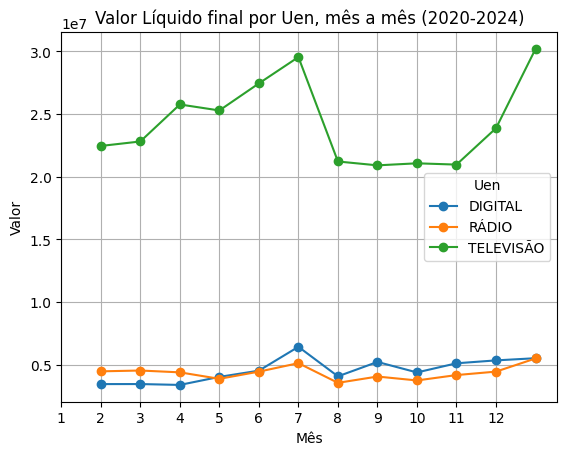

In [23]:
df_agrupado = tabela_de_metas.groupby(['Mês', 'Uen'])['VL Final'].sum().reset_index()

df_todos = df_agrupado.pivot(index='Mês', columns='Uen', values='VL Final')

df_todos = df_todos.reindex(meses)

# Plotar o gráfico de linhas
df_todos.plot(kind='line', marker='o')

plt.xticks(range(len(meses)), meses)

plt.title('Valor Líquido final por Uen, mês a mês (2020-2024)')
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

Agora, para uma melhor visualização vamos criar gráficos das metas por UEN, mas criando uma gráfico para cada ano, mês a mês

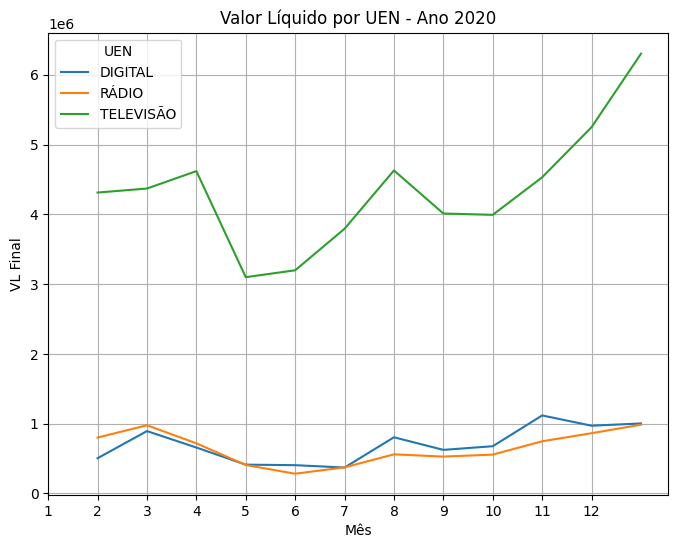

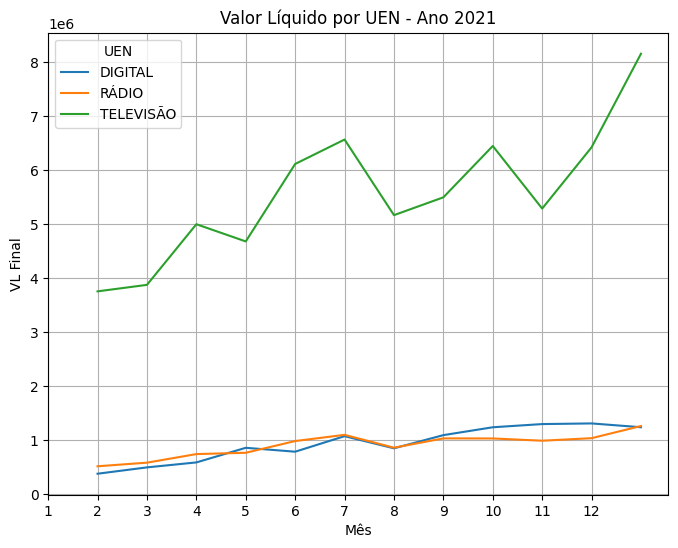

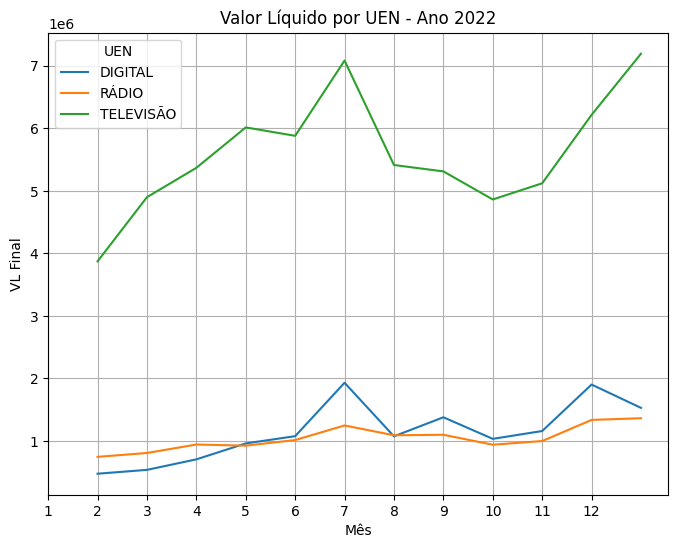

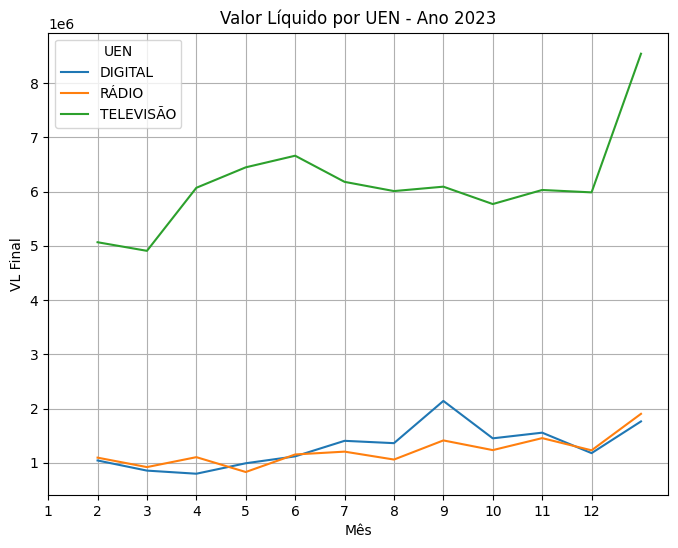

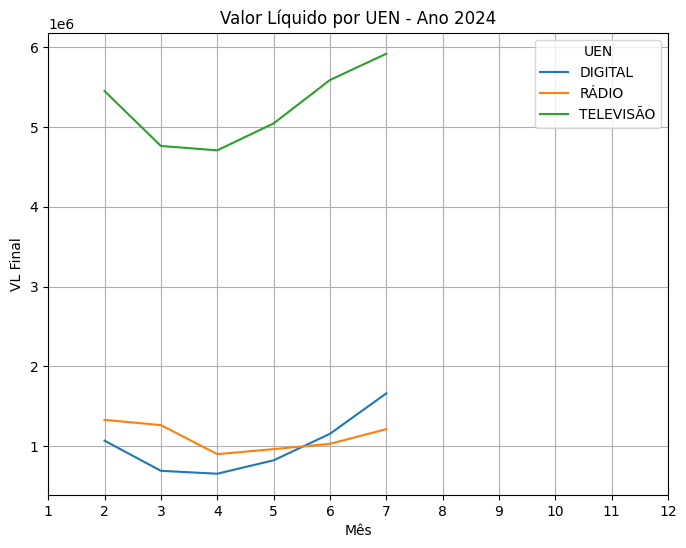

In [24]:
for ano in anos:
    df_ano = tabela_de_metas[tabela_de_metas['Ano'] == ano]
    df_porAno = df_ano.pivot(index='Mês', columns='Uen', values='VL Final')

    plt.figure(figsize=(8, 6))
    plt.plot(df_porAno)
    plt.xticks(range(len(meses)), meses)

    plt.title(f'Valor Líquido por UEN - Ano {ano}')
    plt.xlabel('Mês')
    plt.ylabel('VL Final')
    plt.legend(df_porAno.columns, title='UEN')
    plt.grid(True)
    plt.show()


## Gráficos da Tabela BaseDados_ProjetoINTELI_RG_01_AGOSTO_2024


Vamos carregar o arquivo CSV que contém os dados da tabela citada acima:

In [25]:
# use o bloco abaixo caso utilize o colab e os arquivos no seu google drive, para os quais você deverá procurar o arquivo e escrever o devido caminho.
# caminho_tabela_Ago = '/content/drive/MyDrive/tratada_BaseDados_ProjetoINTELI_RG_01_AGOSTO_2024.cs'

# use o bloco abaixo caso o utilize o VScode para rodar o código, considerando que o arquivo está na pasta "data"
caminho_tabela_Ago = '../data/dados_tratados/tratada_BaseDados_ProjetoINTELI_RG_01_AGOSTO_2024.csv'
df_Ago2024 = pd.read_csv(caminho_tabela_Ago)

### Gráfico Valores de IPCA ES e VL LIQUIDO por Mês com Eixos Secundários (Média do IPCA)

Primeiramente, iremos calcular a média mensal do Índice de Preços ao Consumidor Amplo do Espírito Santo (IPCA ES) e a soma do VL LIQUIDO final para cada mês. Em seguida, visualizaremos essa relação utilizando um gráfico de linhas com eixos secundários, onde:

- O eixo y à esquerda representará os valores de VL LIQUIDO.

- O eixo y à direita representará os valores médios do IPCA ES.

Essa gráfico nos permitirá observar como essas duas variáveis se comportam ao longo dos meses e identificar possíveis correlações ou padrões de comportamento entre o IPCA ES e o VL LIQUIDO final.


Aqui estamos realizando o agrupamento dos dados pelo campo 'Mês', calculando a média do índice IPCA ES e a soma do VL LIQUIDO final para cada mês. Em seguida, criamos uma figura para o gráfico com dois eixos y.

Para finalizar, o gráfico recebe um título, e são aplicados ajustes automáticos no layout para melhorar a disposição dos elementos. O gráfico é exibido com uma grade de fundo para proporcionar uma melhor visualização dos dados.

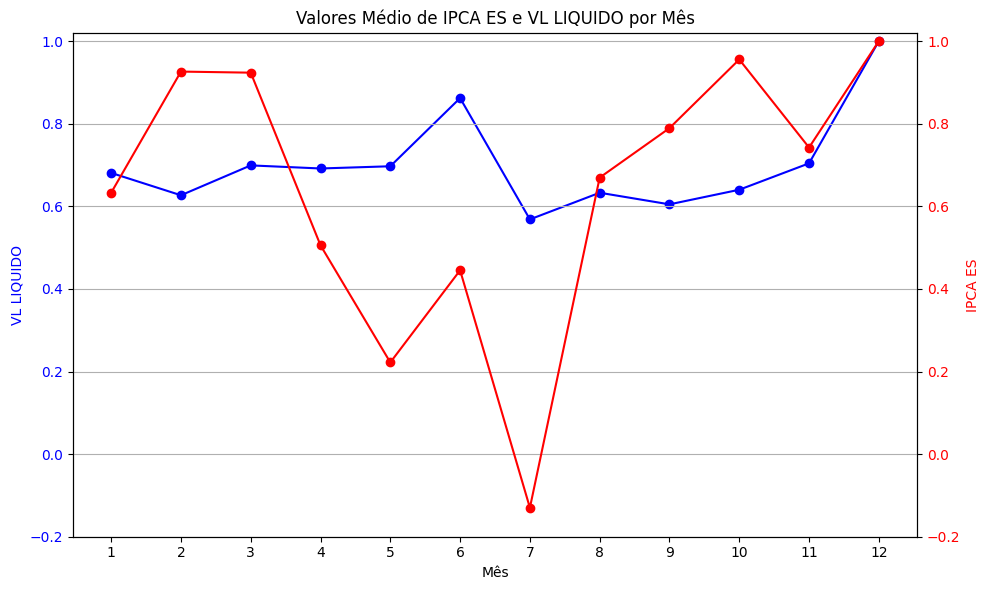

In [26]:

meses_completos = pd.DataFrame({
    'Mês': range(1, 13),
    'Nome Mês': ['1', '2', '3', '4', '5', '6', 
                 '7', '8', '9', '10', '11', '12']
})


df_IPCA_e_VLF_sum = df_Ago2024.groupby('Mês').agg({
    'IPCA ES': 'mean',
    'Vl Liquido Final': 'sum'
}).reset_index()

df_completo = meses_completos.merge(df_IPCA_e_VLF_sum, on='Mês', how='left').fillna(0)  


vl_liquido_max = df_completo['Vl Liquido Final'].max()
ipca_max = df_completo['IPCA ES'].max()

df_completo['Vl Liquido Final Normalizado'] = df_completo['Vl Liquido Final'] / vl_liquido_max
df_completo['IPCA ES Normalizado'] = df_completo['IPCA ES'] / ipca_max


fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.set_xlabel('Mês')
ax1.set_ylabel('VL LIQUIDO', color='blue')
ax1.plot(df_completo['Nome Mês'], df_completo['Vl Liquido Final Normalizado'], marker='o', linestyle='-', color='blue', label='VL LIQUIDO (Normalizado)')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.set_ylabel('IPCA ES', color='red')
ax2.plot(df_completo['Nome Mês'], df_completo['IPCA ES Normalizado'], marker='o', linestyle='-', color='red', label='IPCA ES (Normalizado)')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_ylim([-0.2, 1.02])  
ax2.set_ylim([-0.2, 1.02])


plt.xticks(rotation=45)

plt.title('Valores Médio de IPCA ES e VL LIQUIDO por Mês')
fig.tight_layout()
plt.grid(True)
plt.show()

### Gráfico de Valores Líquidos em relação ao Canal de Vendas

Além disso, vamos criar um gráfico de valor líquido em relação ao canal de vendas. Em primeira instância, para a criação desse gráfico, vamos excluir as colunas que não são úteis para essa gráfico.

In [27]:
df_Ago2024_por_origem = df_Ago2024.drop(columns=['Veiculo', 'UEN', 'Segmento', '% Ating. Meta', 'Cliente', 'Setor', 'VL Tabela', 'Desconto R$', 'Desc %', 'Vl Bruto', 'IPCA ES', 'IPCA BR', 'Taxa Ac. TRI % PIB', 'CONCATENAR'])
df_Ago2024_por_origem.head()

,Origem,Ano,Mês,Vl Liquido Final
0,LI - CONTATO - LINHARES,2022,4,48120.00
1,VT - CONTATO - VITÓRIA,2022,12,9410.05
2,CH - CONTATO - CACHOEIRO,2022,4,4000.00
3,VT - CONTATO - VITÓRIA,2022,12,18631.50
4,LI - CONTATO - LINHARES,2022,4,12980.00


Assim, o próximo gráfico apresentados é dividido por mês, representando a soma dos valores daqueles mês em todos os anos disponíveis, considerando a Origem (canal de venda que realizou a operação/venda) e o e VL líquido final (receita R$) ao longo dos meses, a fim de identificar tendências.

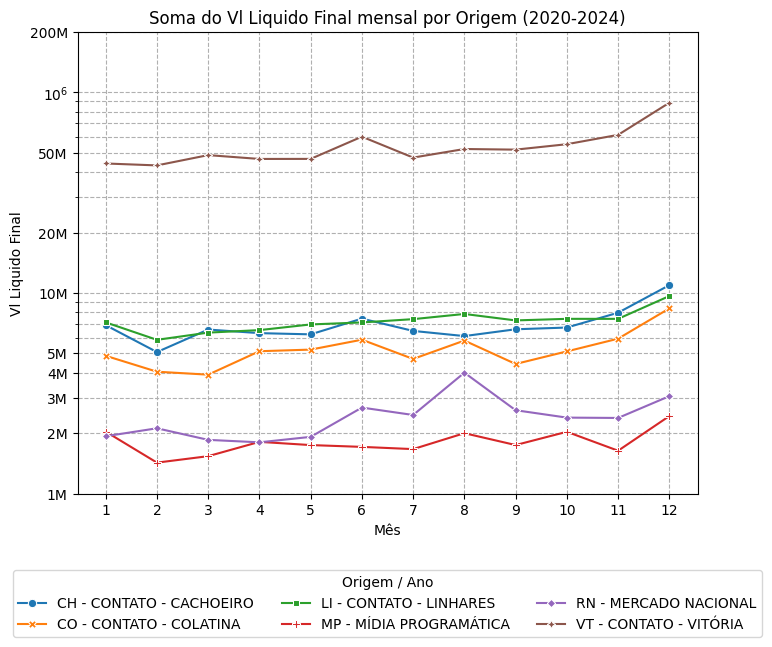

In [28]:
df_Ago2024_por_origem = df_Ago2024_por_origem.sort_values(by=['Ano', 'Mês', 'Origem'])
df_Ago2024_por_origem = df_Ago2024_por_origem.groupby(['Origem', 'Ano', 'Mês'])['Vl Liquido Final'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_Ago2024_por_origem, x='Mês', y='Vl Liquido Final', hue='Origem', style='Origem', markers=True, dashes=False, errorbar=None)

def custom_format(x, pos):
    if x == 1e7:
        return r'$10^6$'
    else:
        return f'{int(x/1e5)}M'

plt.title('Soma do Vl Liquido Final mensal por Origem (2020-2024)')
plt.xlabel('Mês')
plt.ylabel('Vl Liquido Final')
plt.xticks(ticks=range(1, 13), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.legend(title='Origem / Ano', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.yscale('log')
yticks = [0.1e6, 0.2e6, 0.3e6, 0.4e6, 0.5e6, 1e6, 2e6, 5e6, 1e7, 2e7]
plt.yticks(yticks, [f'{int(y/1e6)}M' for y in yticks])
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_format))
plt.gca().yaxis.set_minor_formatter(ticker.NullFormatter())
plt.grid(True, which="both", ls="--")
plt.show()

### Gráficos dos Valores Líquidos Finais Mesal a cada Ano

Agora, vamos criar gráficos do valor líquido final mesal a cada ano, desde 2020 até o primeiro semestre de 2024, primeiro vamos definir os anos e meses que existem nos dados


In [29]:
anos = df_Ago2024['Ano'].unique()
meses = df_Ago2024['Mês'].unique()

Agora vamos fazer um loop para gerar os gráficos de cada ano

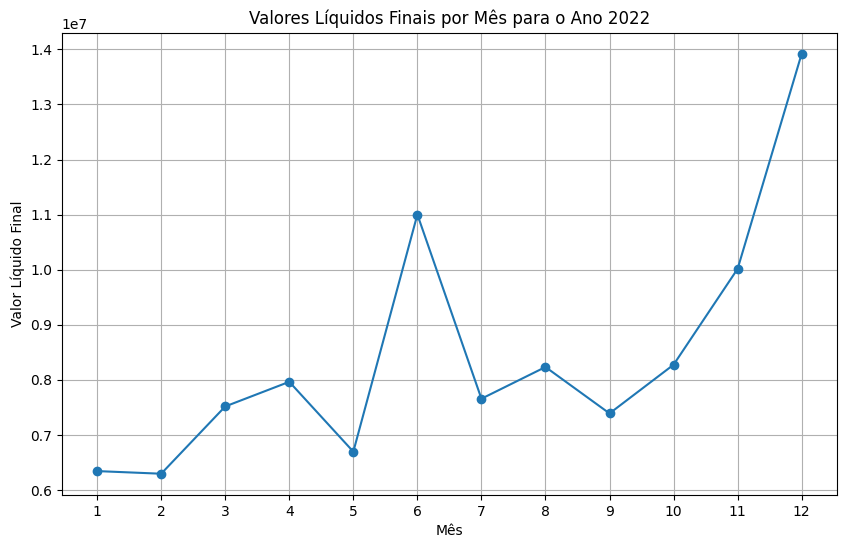

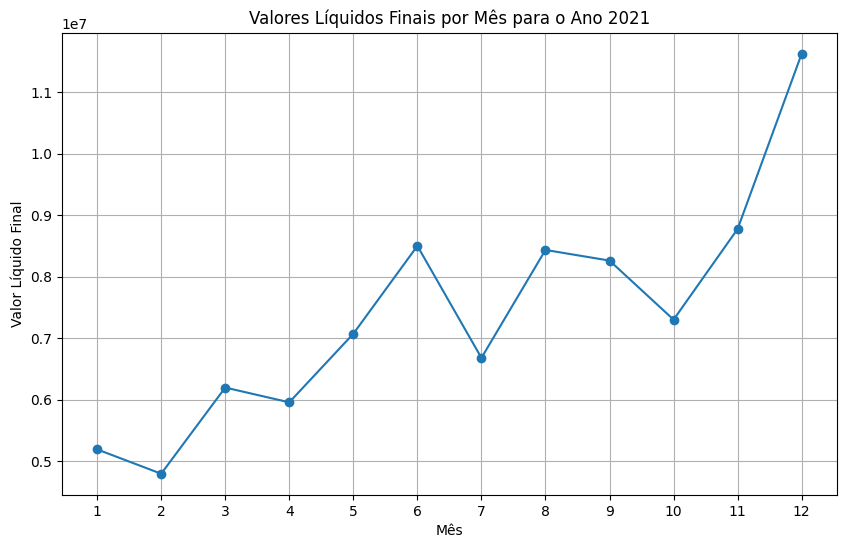

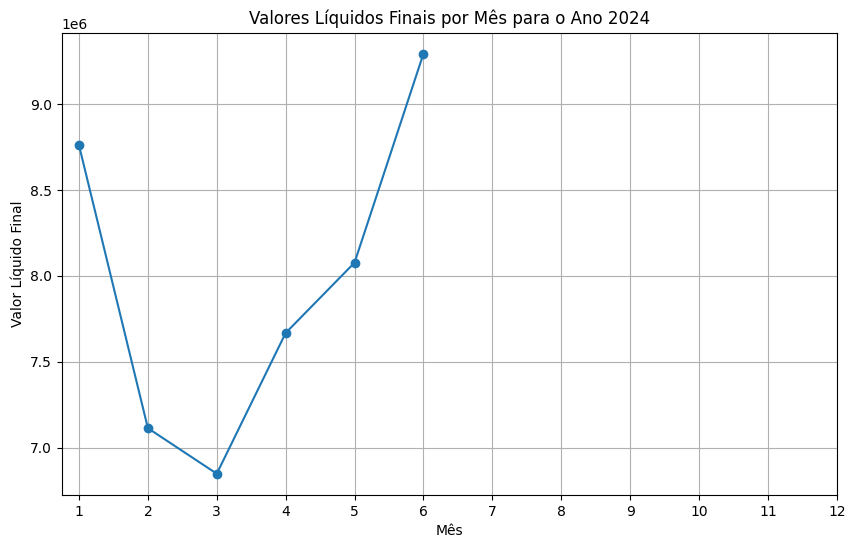

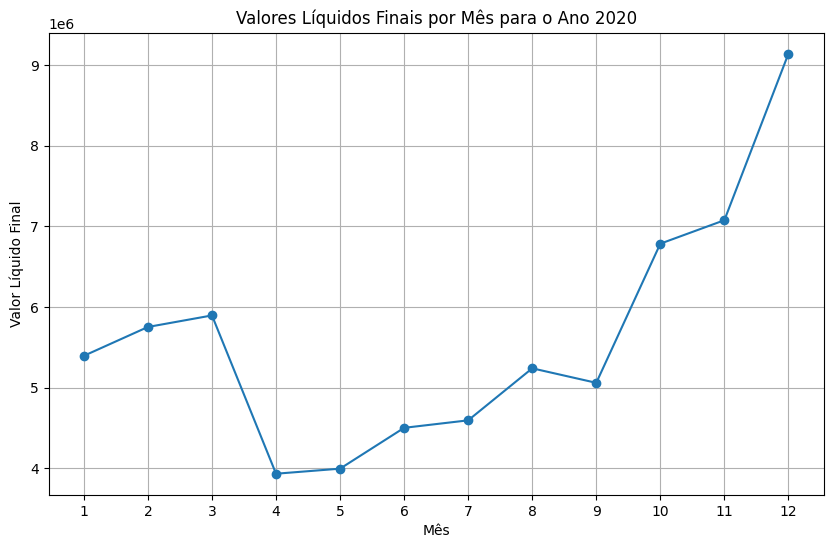

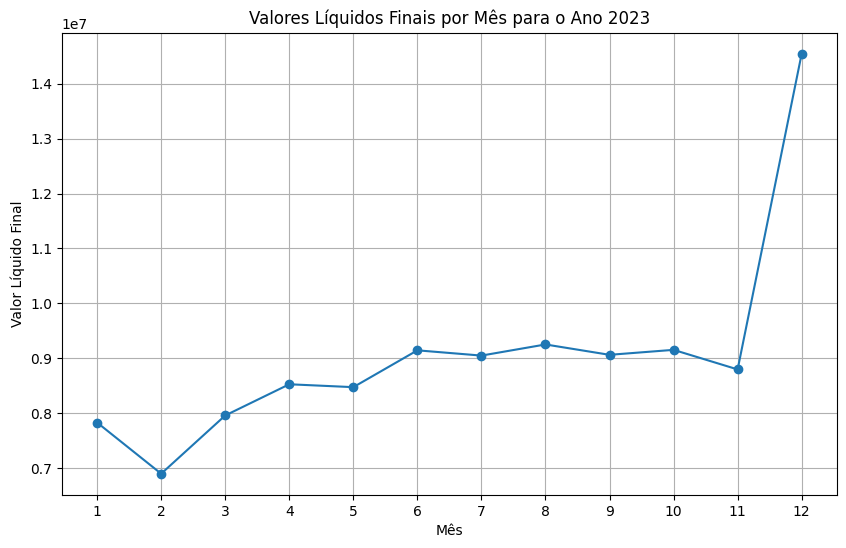

In [30]:
df_VL_por_Mes_e_Ano = df_Ago2024.groupby(['Ano', 'Mês']).agg({'Vl Liquido Final': 'sum'}).reset_index()

for ano in anos:
    df_ano = df_VL_por_Mes_e_Ano[df_VL_por_Mes_e_Ano['Ano'] == ano]


    df_ano = df_ano.sort_values(by='Mês')

    plt.figure(figsize=(10, 6))
    plt.plot(df_ano['Mês'], df_ano['Vl Liquido Final'], marker='o')
    plt.title(f'Valores Líquidos Finais por Mês para o Ano {ano}')
    plt.xlabel('Mês')
    plt.ylabel('Valor Líquido Final')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

### Gráficos dos Valores Líquidos Finais ao longo do tempo, por Segmentos

Primeiro temos de filtrar as informações úteis para criar o gráfico em questão

In [31]:
df_Ago2024_por_segmento = df_Ago2024.drop(columns=['Veiculo', 'UEN', 'Setor', '% Ating. Meta', 'Cliente', 'Origem', 'VL Tabela', 'Desconto R$', 'Desc %', 'Vl Bruto', 'IPCA ES', 'IPCA BR', 'Taxa Ac. TRI % PIB', 'CONCATENAR'])
df_Ago2024_por_segmento.head()

,Segmento,Ano,Mês,Vl Liquido Final
0,SERVICOS,2022,4,48120.00
1,SERVICOS,2022,12,9410.05
2,SERVICOS,2022,4,4000.00
3,COMERCIO,2022,12,18631.50
4,SERVICOS,2022,4,12980.00


O gráfico abaixo é dividido por meses representando o valor líquido a partir de cada segmento identificado nas tabelas, a fim de representar padrões e possíveis tendências

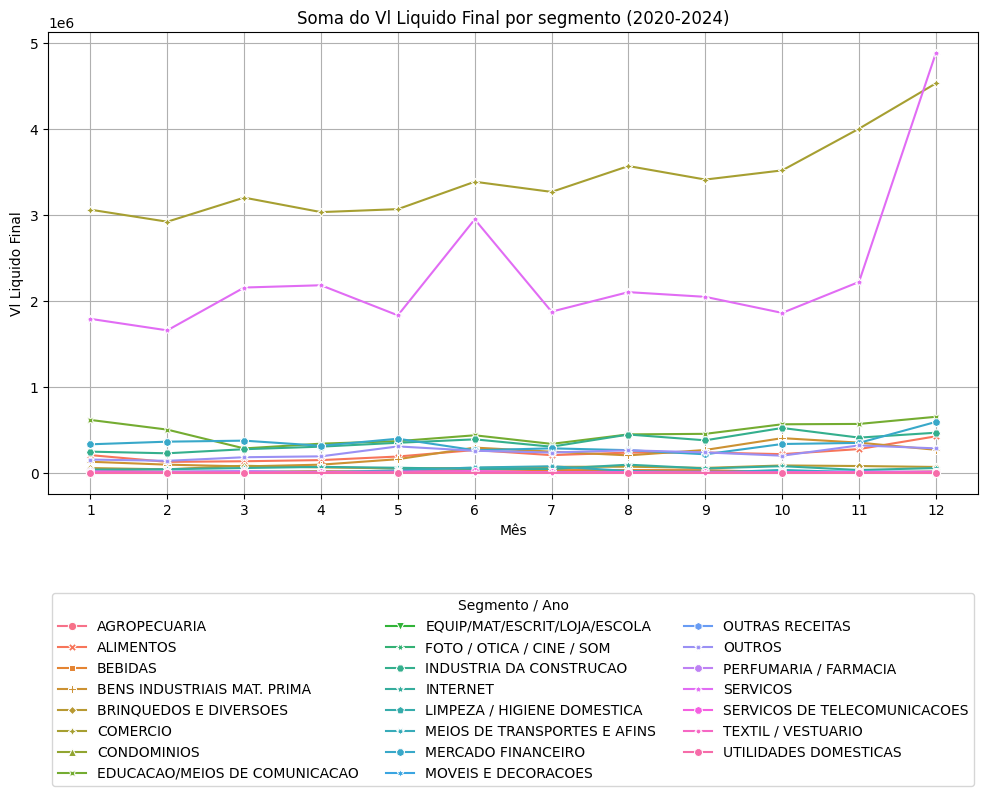

In [32]:
df_Ago2024_por_segmento = df_Ago2024_por_segmento.sort_values(by=['Ano', 'Mês', 'Segmento'])
df_Ago2024_por_segmento = df_Ago2024_por_segmento.groupby(['Segmento', 'Ano', 'Mês'])['Vl Liquido Final'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_Ago2024_por_segmento, x='Mês', y='Vl Liquido Final', hue='Segmento', style='Segmento', markers=True, dashes=False, errorbar=None)

plt.title('Soma do Vl Liquido Final por segmento (2020-2024)')
plt.xlabel('Mês')
plt.ylabel('Vl Liquido Final')
plt.xticks(ticks=range(1, 13), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.legend(title='Segmento / Ano', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.grid(True)
plt.show()